# Visualizing Samples and Labels from SPARK Dataset

This notebook helps to inspect the SPARK dataset. You can see samples from the dataset, with the corresponding ground truth labels.

In [1]:
# import helper class
from utils import SPARKDataset , PyTorchSparkDataset
from matplotlib import pyplot as plt
from random import randint

Found Pytorch


/home/lpauly/.conda/envs/diossa_inference_r2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# set up the path to a local copy of the SPARK dataset, labels csv files should be in the same directory.
dataset_root_dir='./data/' # dataset directory
split='train' #split: train,valid,test
total_images=9 # total number of images in the split
class_map= {'proba_2':0, 'cheops':1, 'debris':2, 'double_star':3, 'earth_observation_sat_1':4, 'lisa_pathfinder':5,
                           'proba_3_csc' :6, 'proba_3_ocs':7, 'smart_1':8, 'soho':9, 'xmm_newton':10} # Class map

dataset = SPARKDataset(class_map, root_dir=dataset_root_dir,split=split)

### Displaying random set of images

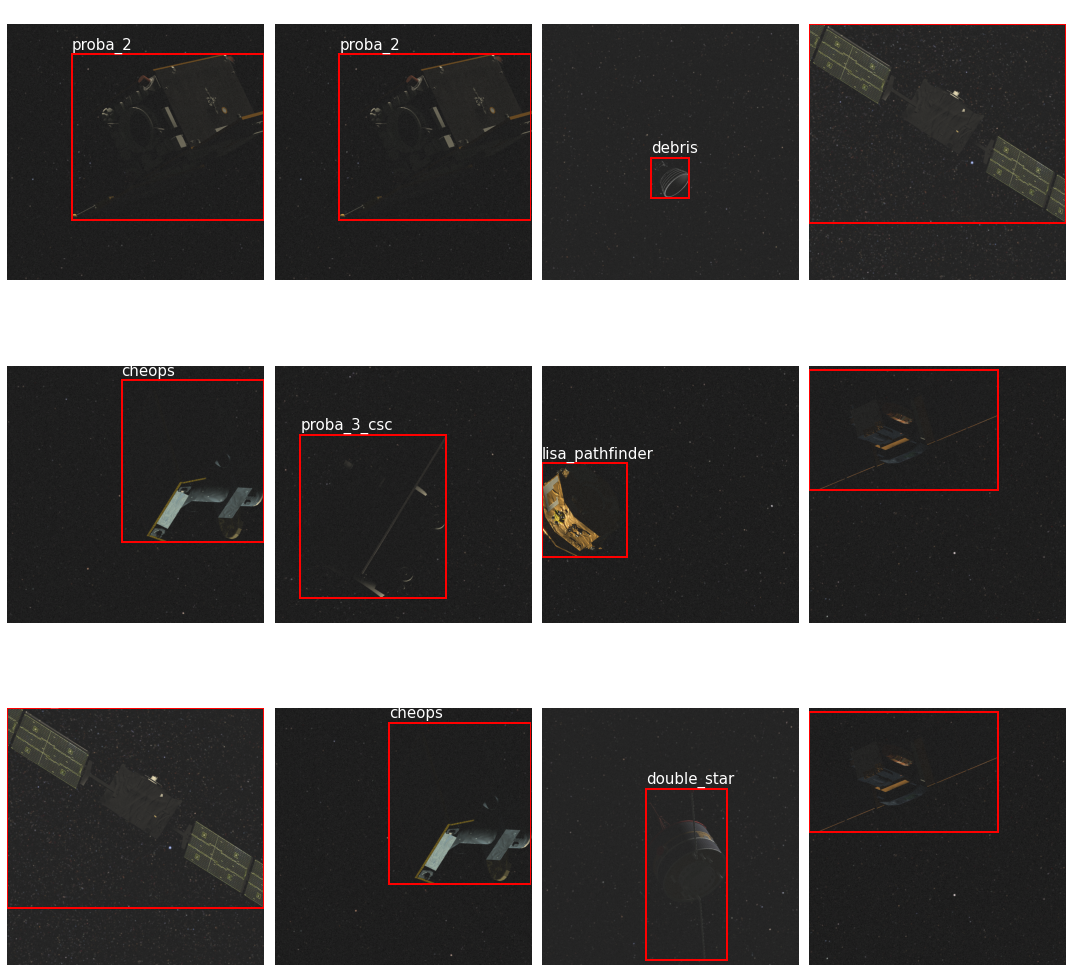

In [4]:
rows = 3
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for i in range(rows):
    for j in range(cols):
        dataset.visualize(randint(0, total_images),size = (10,10),ax=axes[i][j])
        axes[i][j].axis('off')
fig.tight_layout() 

### Pytorch Dataset and Dataloader for SPARK

In [6]:
pytorch_dataset = PyTorchSparkDataset(class_map, root_dir=dataset_root_dir,split='train')

In [7]:
import torch

train_loader = torch.utils.data.DataLoader(pytorch_dataset, batch_size=10,drop_last=True)

for i,sample in enumerate(train_loader):
    print(f'image shape {sample[0].shape} labels shape {sample[1].shape} bounding box shape {sample[2].shape}')
    if i == 3:
        break

image shape torch.Size([10, 3, 1024, 1024]) labels shape torch.Size([10]) bounding box shape torch.Size([10, 4])
